In [0]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage import io
import skimage.morphology as morph

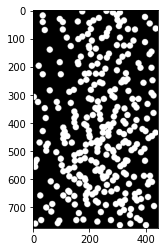

In [11]:
url_path1 = "https://raw.githubusercontent.com/doltonfernandes/CVIT/master/Day2/Images/coins.jpg"    
img = io.imread(url_path1, cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")

In [0]:
h, w = img.shape[:2]
d = 18
r = d // 2

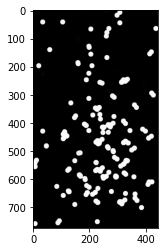

In [13]:
kernel = morph.disk(r)
eroded = cv.erode(img, kernel)
eroded = cv.erode(eroded, morph.disk(2))

overlapping = cv.dilate(eroded, morph.disk(r))

plt.imshow(overlapping, cmap="gray")

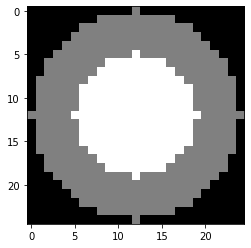

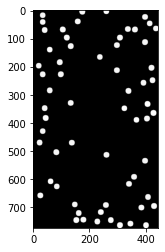

In [14]:
pad = 5

_r = r - 2
coin_mask = morph.disk(_r)
overlay = morph.disk(_r + pad)
overlay[pad:-pad, pad:-pad] += coin_mask
kernel = overlay.astype("int") - 1

singles = cv.morphologyEx(img, cv.MORPH_HITMISS, kernel)
singles = cv.dilate(singles, morph.disk(r+1))

plt.imshow(kernel, cmap="gray")
plt.show()
plt.imshow(singles, cmap="gray")

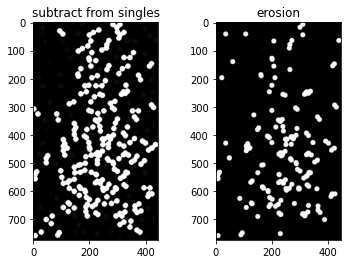

In [15]:
overlapping2 = img - singles
overlapping2 = cv.erode(overlapping2, np.ones((3,3)))

fig = plt.figure()
ax = fig.add_subplot(121)
plt.title("subtract from singles")
ax.imshow(overlapping2, cmap="gray")

ax = fig.add_subplot(122)
plt.title("erosion")
ax.imshow(overlapping, cmap="gray")